In [363]:
import jsonlines
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import plotly.plotly as py
import plotly.graph_objs as go

In [263]:
def is_outlier(points, thresh):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [28]:
SteamGames =pd.read_json('SteamGames.jl', lines = True)

In [113]:
SteamGames.head()

,app_name,developer,discount_price,early_access,genres,id,metascore,price,publisher,release_date,reviews_url,sentiment,specs,tags,title,url
0,The Doorbreaker,Meepower,NaN,False,"[Action, Adventure, Casual, Indie, RPG]",699480.0,NaN,NaN,Meepower,2017-10-17,http://steamcommunity.com/app/699480/reviews/?...,NaN,"[Single-player, Steam Achievements, Full contr...","[Action, Adventure, RPG, Indie, Casual]",The Doorbreaker,http://store.steampowered.com/app/699480/The_D...
1,FoxyLand,BUG-Studio,2.24,False,"[Adventure, Casual, Indie]",718320.0,NaN,2.99,OraMonkey,2017-10-17,http://steamcommunity.com/app/718320/reviews/?...,NaN,"[Single-player, Steam Achievements, Full contr...","[Adventure, Indie, Casual]",FoxyLand,http://store.steampowered.com/app/718320/FoxyL...
2,Sneaky Bears,NaN,9.74,False,NaN,712240.0,NaN,14.99,NaN,NaN,http://steamcommunity.com/app/712240/reviews/?...,NaN,"[Single-player, Steam Achievements, HTC Vive, ...","[Action, Adventure, Indie, Casual]",NaN,http://store.steampowered.com/app/712240/Sneak...
3,OVERTURN,NaN,26.99,False,NaN,650070.0,NaN,29.99,NaN,NaN,http://steamcommunity.com/app/650070/reviews/?...,5 user reviews,"[Single-player, Steam Achievements, Steam Clou...","[Action, Adventure, Puzzle, FPS, Shooter, Firs...",NaN,http://store.steampowered.com/app/650070/OVERT...
4,Heliborne - Russian Federal Security Service C...,JetCat Games,NaN,False,"[Action, Indie, Massively Multiplayer]",730520.0,NaN,2.99,Klabater,2017-10-17,http://steamcommunity.com/app/730520/reviews/?...,NaN,"[Single-player, Multi-player, Co-op, Cross-Pla...","[Action, Massively Multiplayer, Indie]",Heliborne - Russian Federal Security Service C...,http://store.steampowered.com/app/730520/Helib...


In [208]:
SteamGames[['price']] = SteamGames[['price']].replace('Free', 0.).replace('Free to Play', 0.).replace('Free To Play', 0.).replace('Free Demo', 0).replace('Free Mod', 0).replace('Free Movie', 0).replace('Free to Use', 0).replace('Install Now', 0).replace('Install Theme', 0).replace('Play Now', 0).replace('Play WARMACHINE: Tactics Demo', np.nan).replace('Play for Free!', 0).replace('Play the Demo', np.nan).replace('Third-party', np.nan)

In [ ]:
SteamGames.dtypes


In [45]:
SteamGames.developer.nunique()

10064

In [46]:
SteamGames.publisher.nunique()

7453

In [210]:
SteamGames[['metascore']] = SteamGames[["metascore"]].replace('NA', np.nan)

In [129]:
GamePrice = SteamGames.groupby("price").app_name.nunique().dropna()

In [157]:
%matplotlib inline


In [166]:
SteamGames.describe()

,discount_price,id,price
count,769.000000,2.929800e+04,28007.000000
mean,7.626229,4.279659e+05,9.182413
std,15.315415,1.707066e+05,15.739501
min,0.490000,1.000000e+01,0.000000
25%,0.990000,3.179425e+05,2.990000
50%,2.490000,4.323000e+05,4.990000
75%,5.090000,5.607675e+05,9.990000
max,139.990000,2.028850e+06,847.680000


(array([ 3887.,  2212.,  3131.,  1766.,  3920.,   904.,  1119.,  1000.,
          336.,  3645.,    90.,   303.,   399.,    89.,  1466.,    86.,
           94.,    88.,    46.,  1589.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.]),
 <a list of 20 Patch objects>)

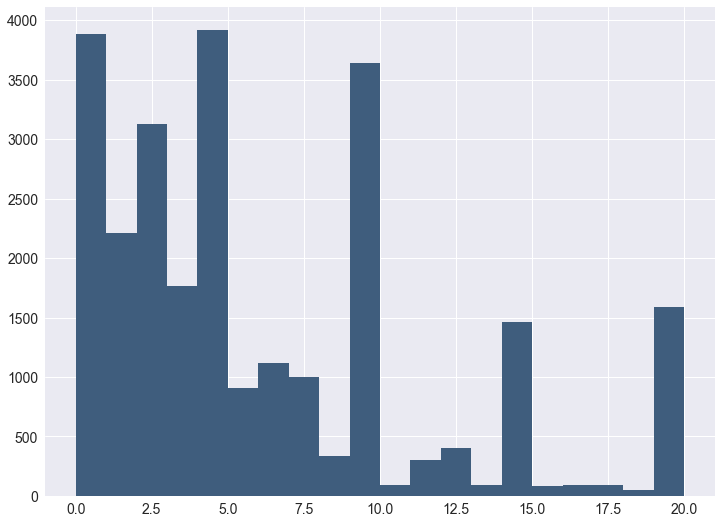

In [264]:
hist_df = SteamGames['price'].dropna()
filtered = hist_df[~is_outlier(hist_df, 3.5)]
plt.figure(figsize=(12,9))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.hist(filtered, color = '#3F5D7D', bins=20)

(array([  3.92200000e+03,   5.31100000e+03,   5.68300000e+03,
          9.08000000e+02,   2.11500000e+03,   3.98100000e+03,
          9.30000000e+01,   6.99000000e+02,   1.55500000e+03,
          8.60000000e+01,   1.83000000e+02,   1.63000000e+03,
          7.00000000e+00,   6.00000000e+00,   3.73000000e+02,
          0.00000000e+00,   9.00000000e+00,   4.87000000e+02,
          2.00000000e+00,   6.00000000e+00,   1.20000000e+02,
          0.00000000e+00,   2.00000000e+00,   3.04000000e+02,
          1.00000000e+00,   2.00000000e+00,   3.10000000e+01,
          0.00000000e+00,   0.00000000e+00,   1.87000000e+02]),
 array([  0.        ,   1.66633333,   3.33266667,   4.999     ,
          6.66533333,   8.33166667,   9.998     ,  11.66433333,
         13.33066667,  14.997     ,  16.66333333,  18.32966667,
         19.996     ,  21.66233333,  23.32866667,  24.995     ,
         26.66133333,  28.32766667,  29.994     ,  31.66033333,
         33.32666667,  34.993     ,  36.65933333,  38.3256

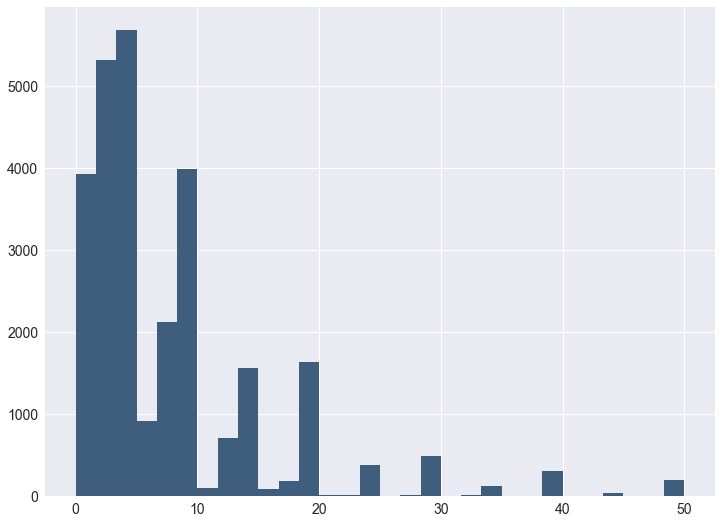

In [324]:
hist_df = SteamGames['price'].dropna()
filtered = hist_df[~is_outlier(hist_df, 10.5)]
plt.figure(figsize=(12,9))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.hist(filtered, color = '#3F5D7D', bins=30)

In [186]:
hist_df20 = hist_df[hist_df['price' > 20.0]]
filtered = hist_df[~is_outlier(hist_df)]
plt.figure(figsize=(12,9))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.hist(filtered, color = '#3F5D7D', bins=30)

#bestselling indie, best selling big name

TypeError: '>' not supported between instances of 'str' and 'float'

In [355]:
SteamGames.groupby('sentiment').app_name.nunique()

sentiment
1 user reviews             2216
2 user reviews             1551
3 user reviews             1092
4 user reviews              910
5 user reviews              727
6 user reviews              691
7 user reviews              572
8 user reviews              481
9 user reviews              455
Overwhelmingly Negative       6
Very Negative                32
Negative                    119
Mostly Negative             758
Mixed                      3785
Mostly Positive            2465
Positive                   2992
Very Positive              3608
Overwhelmingly Positive     272
Name: app_name, dtype: int64

In [354]:
SteamGames.dtypes

app_name                  object
developer                 object
discount_price           float64
early_access                bool
genres                    object
id                       float64
metascore                float64
price                    float64
publisher                 object
release_date      datetime64[ns]
reviews_url               object
sentiment               category
specs                     object
tags                      object
title                     object
url                       object
dtype: object

In [394]:
SteamGames.groupby('sentiment').describe()

discount_price                                      \
                                 count       mean        std   min     25%   
sentiment                                                                    
1 user reviews                    66.0   5.412727  10.616265  0.49  1.0100   
2 user reviews                    52.0   5.887885  11.331374  0.49  1.6025   
3 user reviews                    20.0   7.238000  14.666028  0.59  0.9800   
4 user reviews                    27.0   5.222963   7.474459  0.49  1.6050   
5 user reviews                    16.0  15.283750  35.672162  0.49  1.1725   
6 user reviews                    14.0   9.961429  16.220928  0.49  1.3025   
7 user reviews                     9.0   7.200000  16.108225  0.49  0.7400   
8 user reviews                     8.0   4.111250   4.247828  0.71  1.1275   
9 user reviews                    14.0   4.197143   3.755604  0.74  1.4900   
Overwhelmingly Negative            1.0   2.490000        NaN  2.49  2.4900   
Very Negative                      0.0        NaN        NaN   NaN     NaN   
Negative                           7.0   2.325714   2.403247  0.49  0.6650   
Mostly Negative                   24.0   1.482500   1.453405  0.49  0.4975   
Mixed                            117.0   7.032222  13.581442  0.49  0.5000   
Mostly Positive                   86.0  10.619651  15.208336  0.49  1.0550   
Positive                          66.0   6.734394  17.356259  0.49  1.4900   
Very Positive                     91.0  14.608132  21.955078  0.49  1.6150   
Overwhelmingly Positive            9.0   6.662222   5.900377  0.89  1.4900   

                                                     id                 \
                           50%      75%     max   count           mean   
sentiment                                                                
1 user reviews           1.990   3.5650   49.99  2216.0  474418.079422   
2 user reviews           3.590   5.1275   79.99  1551.0  474042.519665   
3 user reviews           2.590   5.3150   64.99  1092.0  466421.482601   
4 user reviews           2.790   5.1150   39.01   910.0  457232.853846   
5 user reviews           1.990   4.6150  139.99   727.0  450012.275103   
6 user reviews           2.490   4.5900   49.96   691.0  444057.856729   
7 user reviews           1.240   3.4900   49.96   572.0  451294.083916   
8 user reviews           2.865   5.2275   13.49   481.0  437725.900208   
9 user reviews           2.490   7.2900   10.49   455.0  436523.129670   
Overwhelmingly Negative  2.490   2.4900    2.49     6.0  277088.666667   
Very Negative              NaN      NaN     NaN    32.0  336629.093750   
Negative                 0.990   3.4900    6.49   119.0  391740.218487   
Mostly Negative          0.815   1.8650    6.29   758.0  384426.374670   
Mixed                    1.390   3.7900   44.98  3787.0  374612.608925   
Mostly Positive          3.415   9.9275   44.98  2465.0  365414.027181   
Positive                 3.020   6.2900  139.99  2993.0  429482.330438   
Very Positive            3.990  15.1150  119.40  3608.0  334965.378049   
Overwhelmingly Positive  4.990   9.9900   16.99   272.0  276824.011029   

                          ...   metascore         price                        \
                          ...         75%   max   count       mean        std   
sentiment                 ...                                                   
1 user reviews            ...       80.00  85.0  2143.0   7.403924  12.732409   
2 user reviews            ...       82.00  85.0  1493.0   8.284367  15.126359   
3 user reviews            ...       77.00  85.0  1056.0   8.681487  19.770487   
4 user reviews            ...       80.00  81.0   873.0   8.656758  12.076664   
5 user reviews            ...       75.50  82.0   695.0   9.266633  17.474289   
6 user reviews            ...       82.00  89.0   661.0   8.547035  14.883426   
7 user reviews            ...       75.25  82.0   549.0   8.280000  19.508465   
8 user reviews      

In [402]:
SteamGames.sentiment = SteamGames.sentiment.astype(
    "category",categories = ["1 user reviews","2 user reviews","3 user reviews", "4 user reviews", "5 user reviews", "6 user reviews",
                            "7 user reviews", "8 user reviews", "9 user reviews", "Overwhelmingly Negative", "Very Negative",
                            "Negative", "Mostly Negative", "Mixed", "Mostly Positive", "Positive", "Very Positive",
                            "Overwhelmingly Positive"], ordered=True)

TypeError: _astype() got an unexpected keyword argument 'categories'

In [349]:
sns.jointplot(SteamGames['sentiment'], SteamGames['metascore'])

ValueError: could not convert string to float: 'Mostly Positive'

ValueError: could not convert string to float: 'Mostly Positive'

In [211]:
hist_df.dtypes
hist_meta.dtypes

dtype('O')

(array([   1.,    0.,    0.,    0.,    1.,    0.,    0.,    1.,    0.,
           1.,    1.,    0.,    2.,    1.,    2.,    3.,    2.,    2.,
           2.,    3.,    5.,    8.,    1.,   10.,    3.,    4.,    6.,
           7.,    8.,   17.,   11.,   13.,   15.,   17.,   24.,   27.,
          19.,   34.,   37.,   40.,   18.,   49.,   41.,   58.,   49.,
          59.,   77.,   59.,   95.,   79.,   81.,   71.,   97.,   94.,
         106.,   96.,   93.,  105.,   92.,   92.,  119.,   93.,   87.,
          80.,   53.,   52.,   52.,   34.,   28.,   27.,   20.,   20.,
          11.,    6.,    7.,    5.]),
 array([ 20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,
         31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
         42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,
         53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,
         64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,
         75.,  76.,  77.

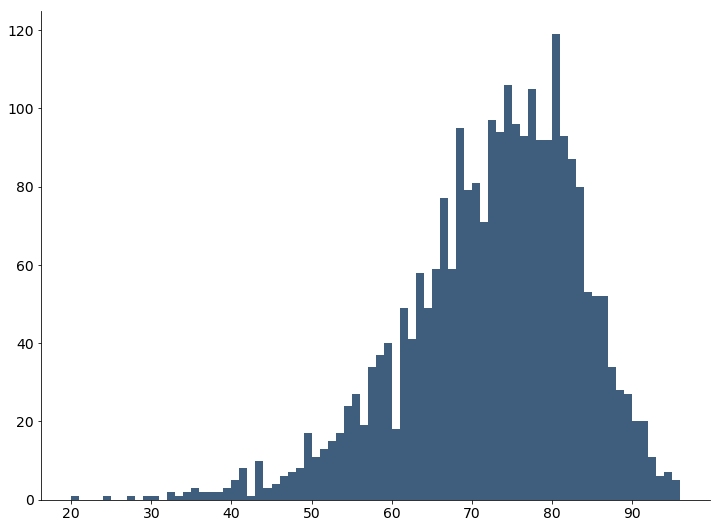

In [221]:
hist_meta = SteamGames['metascore'].dropna()
plt.figure(figsize=(12,9))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14,)
plt.yticks(fontsize=14)
plt.hist(hist_meta, color = '#3F5D7D', bins=76, label = "Metascore")

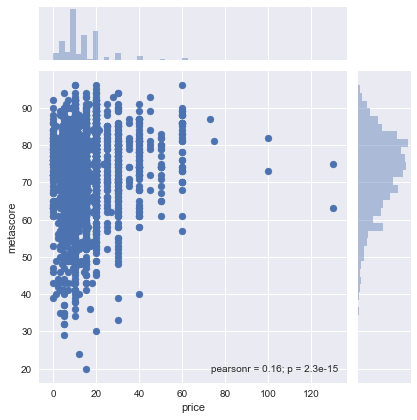

In [253]:
#sgprice = SteamGames['price']
#sgmeta = SteamGames['metascore']
#filteredp = sgprice[~is_outlier(sgprice)]
#filteredm = sgmeta[~is_outlier(sgmeta)]
sns.jointplot(SteamGames['price'], SteamGames['metascore'])

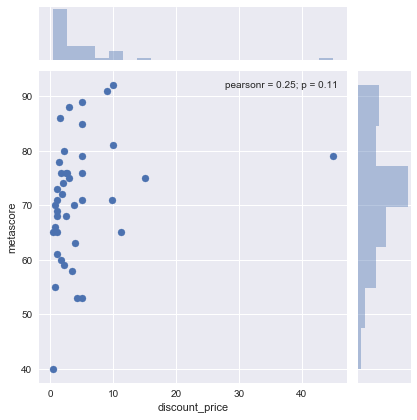

In [248]:
sns.jointplot(SteamGames['discount_price'], SteamGames['metascore'])

TypeError: ufunc multiply cannot use operands with types dtype('<M8[ns]') and dtype('float64')

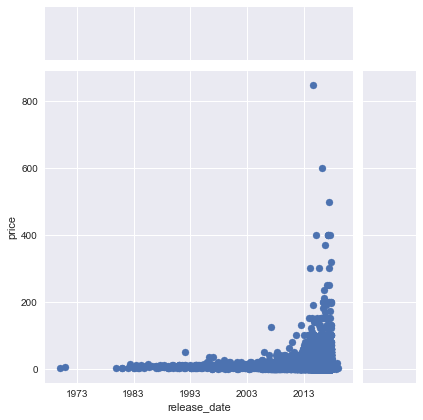

In [434]:
sns.jointplot(SteamGames['release_date'], SteamGames['price'])

/Users/bdbrunson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



(14041, 16)

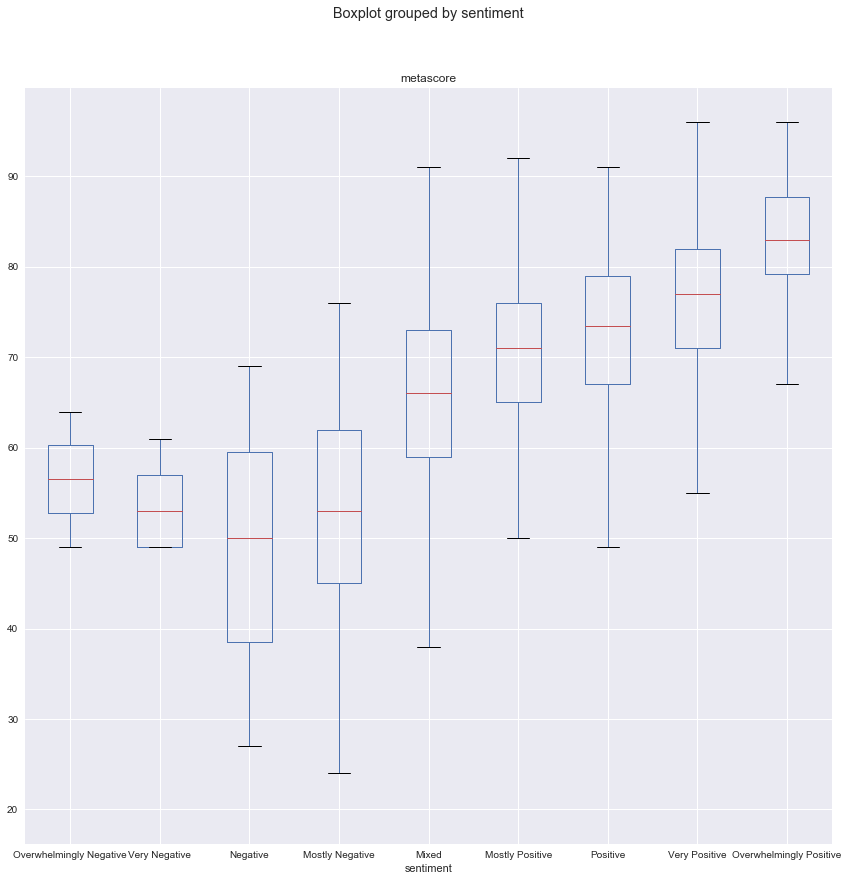

In [432]:
FG = SteamGames[(SteamGames["sentiment"].isin(["Overwhelmingly Negative", "Very Negative","Negative", "Mostly Negative", "Mixed", "Mostly Positive", "Positive", "Very Positive",
                            "Overwhelmingly Positive"]))]
FG["sentiment"] = FG["sentiment"].cat.remove_unused_categories()
FG.boxplot(column="metascore",        # Column to plot
                 by= "sentiment", #("Overwhelmingly Negative", "Very Negative",
                            #"Negative", "Mostly Negative", "Mixed", "Mostly Positive", "Positive", "Very Positive",
                            #"Overwhelmingly Positive")         # Column to split uponn
figsize = (14,14))
FG.shape
    
    # Figure size
    #compare popular developers vs popular indie devs

In [428]:
FFG = FG
FFG = FFG.dropna(subset = ["price", "sentiment"])

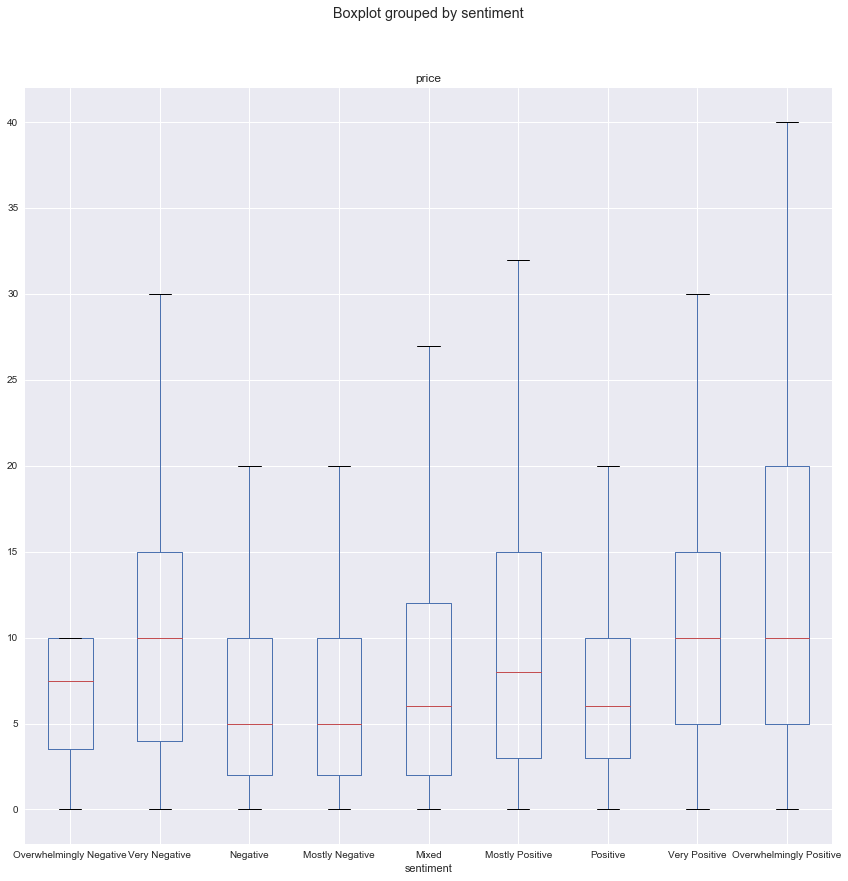

In [433]:
FG.boxplot(column="price",        # Column to plot
                 by= "sentiment", #("Overwhelmingly Negative", "Very Negative",
                            #"Negative", "Mostly Negative", "Mixed", "Mostly Positive", "Positive", "Very Positive",
                            #"Overwhelmingly Positive")         # Column to split upon
figsize = (14,14), showfliers=False)

    
    # Figure size

In [327]:
SteamGames.dtypes

app_name                  object
developer                 object
discount_price           float64
early_access                bool
genres                    object
id                       float64
metascore                float64
price                    float64
publisher                 object
release_date      datetime64[ns]
reviews_url               object
sentiment                 object
specs                     object
tags                      object
title                     object
url                       object
dtype: object

In [328]:
SteamGames.isnull().sum()

app_name              2
developer          2865
discount_price    28531
early_access          0
genres             2857
id                    2
metascore         26767
price              1293
publisher          7324
release_date       1883
reviews_url           2
sentiment          6564
specs               584
tags                177
title              1752
url                   0
dtype: int64

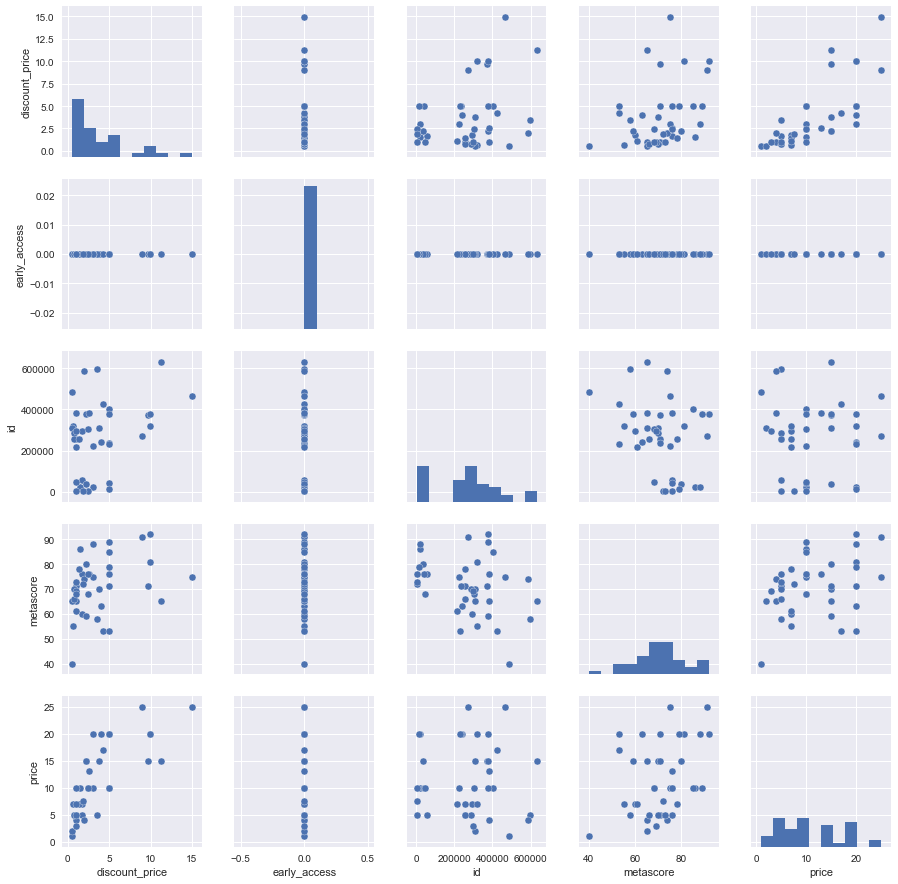

In [348]:
#df = SteamGames[np.isfinite(SteamGames)]
CS = SteamGames.dropna()
sns.pairplot(CS)
#try coloring based on type- movies or simulator or software or games
#correlation plot- games on both axis, ratings for regular players and y meta critics, heat map

In [361]:
import plotly.plotly as py
import plotly.graph_objs as go

release_date
1970-01-01    1
1970-12-16    1
1980-01-01    1
1981-01-01    2
1982-01-01    1
1982-05-21    1
1983-01-01    2
1983-06-19    1
1983-11-01    1
1984-01-01    1
1984-03-02    1
1984-04-29    1
1984-11-01    1
1985-01-01    1
1985-07-10    1
1985-10-16    1
1986-05-01    1
1987-01-01    3
1987-04-17    1
1987-08-21    1
1987-09-07    1
1987-09-30    1
1987-11-06    1
1988-01-01    2
1988-04-16    1
1988-05-01    1
1988-06-01    1
1988-09-23    1
1988-12-23    1
1989-01-01    5
             ..
2017-11-30    1
2017-12-01    2
2017-12-08    1
2017-12-10    2
2017-12-13    1
2017-12-20    1
2017-12-25    1
2018-01-01    9
2018-01-31    1
2018-02-01    1
2018-03-01    1
2018-03-14    1
2018-03-22    1
2018-03-30    1
2018-04-01    1
2018-04-19    1
2018-05-30    1
2018-06-30    1
2018-08-01    1
2018-08-06    1
2018-08-22    1
2018-08-30    1
2018-09-10    1
2018-09-17    1
2018-09-25    2
2018-12-01    1
2018-12-17    1
2018-12-31    1
2019-09-16    1
2020-01-01    1
Name: app_n

In [243]:
SteamGames['release_date']= pd.to_datetime(SteamGames['release_date'], errors= 'coerce')

In [356]:
SteamGames.sort_values('price', ascending=False).head(3)

,app_name,developer,discount_price,early_access,genres,id,metascore,price,publisher,release_date,reviews_url,sentiment,specs,tags,title,url
2426,X-Plane 10 Global - 64 Bit,Laminar Research,NaN,False,[Simulation],292180.0,NaN,847.68,Aerosoft GmbH,2014-07-14,http://steamcommunity.com/app/292180/reviews/?...,Mixed,"[Single-player, Multi-player, Cross-Platform M...","[Simulation, Flight, Realistic, Open World, Mu...",X-Plane 10 Global - 64 Bit,http://store.steampowered.com/app/292180/XPlan...
5676,HTC Vive,NaN,NaN,False,NaN,358040.0,NaN,599.00,NaN,2016-04-05,http://steamcommunity.com/app/358040/reviews/?...,NaN,NaN,"[VR, Hardware, Futuristic, First-Person, Simul...",HTC Vive,http://store.steampowered.com/app/358040/HTC_V...
9496,EVE Online: 15400 PLEX,CCP,NaN,False,"[Free to Play, Massively Multiplayer, RPG]",629796.0,NaN,499.99,CCP,2017-05-09,http://steamcommunity.com/app/629796/reviews/?...,NaN,"[Online Multi-Player, MMO, Downloadable Conten...","[Free to Play, RPG, Massively Multiplayer]",EVE Online: 15400 PLEX,http://store.steampowered.com/app/629796/EVE_O...


In [357]:
SteamGames.sort_values('metascore', ascending=True).head(3)

,app_name,developer,discount_price,early_access,genres,id,metascore,price,publisher,release_date,reviews_url,sentiment,specs,tags,title,url
27348,Citadels,Games Distillery s.r.o.,NaN,False,"[Action, Strategy]",238870.0,20.0,14.99,THQ Nordic,2013-07-25,http://steamcommunity.com/app/238870/reviews/?...,Very Negative,"[Single-player, Steam Achievements, Steam Trad...","[Strategy, Action, Medieval, RTS]",Citadels,http://store.steampowered.com/app/238870/Citad...
28185,Postal III,Trashmasters,NaN,False,[Action],10220.0,24.0,11.99,Akella,2011-12-21,http://steamcommunity.com/app/10220/reviews/?b...,Mostly Negative,"[Single-player, Steam Achievements]","[Action, Dark Humor, Gore, Third-Person Shoote...",Postal III,http://store.steampowered.com/app/10220/Postal...
959,Fray: Reloaded Edition,Brain Candy,NaN,False,"[Action, Strategy, Indie]",210490.0,27.0,NaN,Brain Candy,2012-06-19,http://steamcommunity.com/app/210490/reviews/?...,Negative,[Multi-player],"[Strategy, Action, Indie]",Fray: Reloaded Edition,http://store.steampowered.com/app/210490/Fray_...


In [358]:
SteamGames.sort_values('metascore', ascending=False).head(3)

,app_name,developer,discount_price,early_access,genres,id,metascore,price,publisher,release_date,reviews_url,sentiment,specs,tags,title,url
3474,Grand Theft Auto V,Rockstar North,NaN,False,"[Action, Adventure]",271590.0,96.0,59.99,Rockstar Games,2015-04-14,http://steamcommunity.com/app/271590/reviews/?...,Mixed,"[Single-player, Multi-player, Steam Achievemen...","[Open World, Action, Multiplayer, First-Person...",Grand Theft Auto V,http://store.steampowered.com/app/271590/Grand...
29220,Half-Life 2,Valve,NaN,False,[Action],220.0,96.0,9.99,Valve,2004-11-16,http://steamcommunity.com/app/220/reviews/?bro...,Overwhelmingly Positive,"[Single-player, Steam Achievements, Steam Trad...","[FPS, Action, Sci-fi, Singleplayer, Classic, S...",Half-Life 2,http://store.steampowered.com/app/220/HalfLife_2/
29200,Half-Life,Valve,NaN,False,[Action],70.0,96.0,9.99,Valve,1998-11-08,http://steamcommunity.com/app/70/reviews/?brow...,Overwhelmingly Positive,"[Single-player, Multi-player, Valve Anti-Cheat...","[FPS, Classic, Action, Sci-fi, Singleplayer, S...",Half-Life,http://store.steampowered.com/app/70/HalfLife/


In [359]:
SteamGames.sort_values('release_date', ascending=False).head(3)

,app_name,developer,discount_price,early_access,genres,id,metascore,price,publisher,release_date,reviews_url,sentiment,specs,tags,title,url
13547,Hereafter,"Micah Brown,Benjamin Brown",NaN,False,"[Action, Adventure, Indie]",652330.0,NaN,NaN,Nathan Brown,2020-01-01,http://steamcommunity.com/app/652330/reviews/?...,NaN,"[Single-player, Partial Controller Support]","[Adventure, Action, Indie]",Hereafter,http://store.steampowered.com/app/652330/Herea...
18457,The End of an Age: Fading Remnants,Poetic Justice Studios,NaN,False,[RPG],398950.0,NaN,NaN,Poetic Justice Studios,2019-09-16,http://steamcommunity.com/app/398950/reviews/?...,NaN,"[Single-player, Full controller support]","[RPG, RPGMaker]",The End of an Age: Fading Remnants,http://store.steampowered.com/app/398950/The_E...
11307,Reality Incognita,Dire Boar Games,NaN,True,"[Adventure, Early Access]",604550.0,NaN,2.99,Dire Boar Games,2018-12-31,http://steamcommunity.com/app/604550/reviews/?...,NaN,"[Single-player, Steam Achievements]","[Early Access, Adventure]",Reality Incognita,http://store.steampowered.com/app/604550/Reali...


In [360]:
SteamGames.sort_values('release_date', ascending=True).head(3)

,app_name,developer,discount_price,early_access,genres,id,metascore,price,publisher,release_date,reviews_url,sentiment,specs,tags,title,url
11438,Bitcoin Clicker,"lalalaZero,Urbanoff",NaN,True,"[Casual, Indie, Early Access]",716110.0,NaN,0.99,Cisamid Inc.,1970-01-01,http://steamcommunity.com/app/716110/reviews/?...,Mixed,"[Single-player, Multi-player, Online Multi-Pla...","[Early Access, Indie, Casual]",Bitcoin Clicker,http://store.steampowered.com/app/716110/Bitco...
16047,Hercules in New York,NaN,NaN,False,NaN,582750.0,NaN,3.99,NaN,1970-12-16,http://steamcommunity.com/app/582750/reviews/?...,1 user reviews,[Captions available],"[Movie, Action-Adventure]",Hercules in New York,http://store.steampowered.com/app/582750/Hercu...
16091,Gallagher: An Uncensored Evening,NaN,NaN,False,NaN,579610.0,NaN,2.99,NaN,1980-01-01,http://steamcommunity.com/app/579610/reviews/?...,1 user reviews,[Captions available],[Movie],Gallagher: An Uncensored Evening,http://store.steampowered.com/app/579610/Galla...


In [1]:
SteamGames.iloc[0:100,:].tags.contains("Indie")

NameError: name 'SteamGames' is not defined

In [442]:
SteamGames['tags'].str.contains("Movie").isnull()

<bound method Series.count of 0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
29270    True
29271    True
29272    True
29273    True
29274    True
29275    True
29276    True
29277    True
29278    True
29279    True
29280    True
29281    True
29282    True
29283    True
29284    True
29285    True
29286    True
29287    True
29288    True
29289    True
29290    True
29291    True
29292    True
29293    True
29294    True
29295    True
29296    True
29297    True
29298    True
29299    True
Name: tags, Length: 29300, dtype: bool>